<a href="https://colab.research.google.com/github/a1ire3a/CNN-PreTrain-Data-Augmentation/blob/main/Image_proc_CNN_PreTrain_DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CNN***

In [ ]:
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


# **Pre-Processing:**

In [ ]:
y_train_1hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_1hot = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train_std = x_train / 255.0
x_test_std = x_test / 255.0

# **CNN:**

In [ ]:
model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer='adam' ,loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

rep = model.fit(x_train_std, y_train_1hot, epochs=10, validation_data=(x_test_std, y_test_1hot))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6351 - accuracy: 0.3961 - val_loss: 1.1866 - val_accuracy: 0.5776
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1377 - accuracy: 0.5995 - val_loss: 1.0172 - val_accuracy: 0.6500
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9339 - accuracy: 0.6741 - val_loss: 0.8412 - val_accuracy: 0.7072
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8065 - accuracy: 0.7242 - val_loss: 0.7863 - val_accuracy: 0.7253
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7159 - accuracy: 0.7522 - val_loss: 0.7489 - val_accuracy: 0.7424
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6475 - accuracy: 0.7788 - val_loss: 0.7253 - val_accuracy: 0.7563
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5888 - accuracy: 0.7972 - val_loss: 0.7153 - val_ac

مدل برای 10 ایپاک اجرا شده است

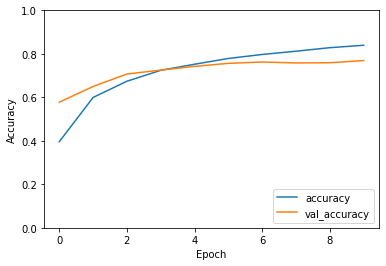

In [ ]:
plt.plot(rep.history['accuracy'], label='accuracy')
plt.plot(rep.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

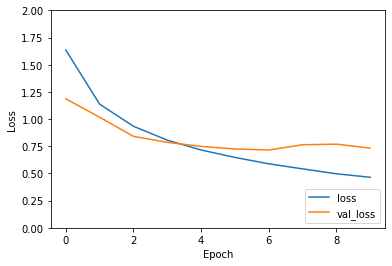

In [ ]:
plt.plot(rep.history['loss'], label='loss')
plt.plot(rep.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

# **Pre-Train:**

In [ ]:
from keras.applications import vgg16
#from keras.applications import resnet_v2

برای مدل از پیش تعریف شده، از دو مدل 

resnet , vgg16

استفاده کردم که 

resnet

 به علت اینکه نتیجه خوبی نمیگرفت کامنت شده و فقط نتایج برای 

 vgg16

 ارزیابی شده است

In [ ]:
base_model = vgg16.VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train_1hot.shape[1])
#base_model = resnet_v2.ResNet50V2(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train_1hot.shape[1])

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers[:16]:
  layer.trainable = False
for layer in base_model.layers[16:]:
  layer.trainable = True
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
ptModel = Sequential()
ptModel.add(base_model)
ptModel.add(Flatten())
#ptModel.add(Dense(128, activation='relu'))
#ptModel.add(Dropout(0.5))
#ptModel.add(Dense(10, activation='softmax'))

#ptModel.add(Dense(1024,activation=('relu'),input_dim=512))
ptModel.add(Dense(512,activation=('relu'))) 
#ptModel.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
ptModel.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
ptModel.add(Dense(10,activation=('softmax'))) #This is the classification layer

ptModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 15,044,298
Trainable params: 10,324,682
Non-trainable params: 4,719,616
_________________________________________________________________


In [ ]:
ptModel.compile(optimizer='adam' ,loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

rep = ptModel.fit(x_train_std, y_train_1hot, epochs=10, validation_data=(x_test_std, y_test_1hot))

Epoch 1/10
1563/1563 [==============================] - 54s 29ms/step - loss: 1.7401 - accuracy: 0.3051 - val_loss: 1.3354 - val_accuracy: 0.4696
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2211 - accuracy: 0.5460 - val_loss: 1.0437 - val_accuracy: 0.6225
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9217 - accuracy: 0.6792 - val_loss: 0.8307 - val_accuracy: 0.7180
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7595 - accuracy: 0.7431 - val_loss: 0.8408 - val_accuracy: 0.7286
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6378 - accuracy: 0.7859 - val_loss: 0.7509 - val_accuracy: 0.7620
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.5560 - accuracy: 0.8183 - val_loss: 0.7530 - val_accuracy: 0.7620
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.4939 - accuracy: 0.8388 - val_loss: 0.6724 -

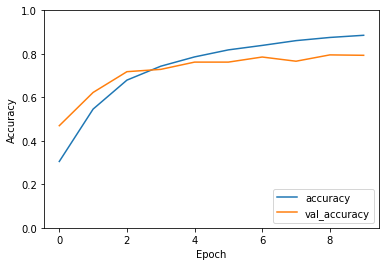

In [ ]:
plt.plot(rep.history['accuracy'], label='accuracy')
plt.plot(rep.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

اختلاف 10تایی بین دقت ها در ایپاک های اخر بیانگر این است که مدل نزدیک به اورفیت شدن است.

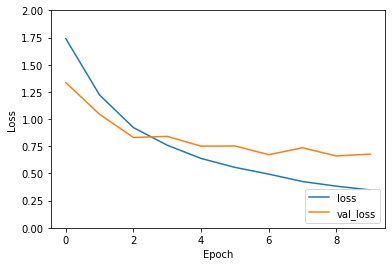

In [ ]:
plt.plot(rep.history['loss'], label='loss')
plt.plot(rep.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

# **Data Augmentation:**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    #featurewise_center=True, 
    #samplewise_center=True,
    rotation_range=20,
    horizontal_flip=True,
    #vertical_flip=True
    #width_shift_range=0.1,
    #height_shift_range=0.1
    #zoom_range=0.3
    rescale=2,
    fill_mode="constant"
    )
datagen.fit(x_train_std)

In [ ]:
model.compile(optimizer='adam' ,loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
rep = model.fit_generator(datagen.flow(x_train_std, y_train_1hot, batch_size=128),
                    steps_per_epoch = len(x_train_std) / 128, epochs=10, validation_data=(x_test_std, y_test_1hot))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
390/390 [==============================] - 38s 96ms/step - loss: 0.6218 - accuracy: 0.7917 - val_loss: 0.6683 - val_accuracy: 0.7839
Epoch 2/10
390/390 [==============================] - 38s 98ms/step - loss: 0.5294 - accuracy: 0.8207 - val_loss: 0.5744 - val_accuracy: 0.8125
Epoch 3/10
390/390 [==============================] - 37s 94ms/step - loss: 0.4965 - accuracy: 0.8317 - val_loss: 0.5441 - val_accuracy: 0.8182
Epoch 4/10
390/390 [==============================] - 37s 94ms/step - loss: 0.4718 - accuracy: 0.8405 - val_loss: 0.5604 - val_accuracy: 0.8101
Epoch 5/10
390/390 [==============================] - 36s 93ms/step - loss: 0.4578 - accuracy: 0.8446 - val_loss: 0.4859 - val_accuracy: 0.8363
Epoch 6/10
390/390 [==============================] - 36s 92ms/step - loss: 0.4444 - accuracy: 0.8478 - val_loss: 0.5092 - val_accuracy: 0.8293
Epoch 7/10
390/390 [==============================] - 36s 92ms/step - loss: 0.4409 - accuracy: 0.8506 - val_loss: 0.5453 - val_accuracy:

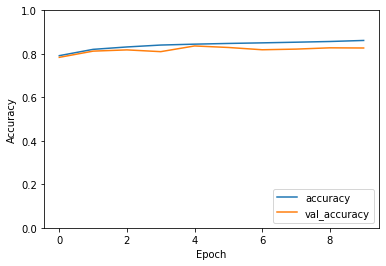

In [ ]:
plt.plot(rep.history['accuracy'], label='accuracy')
plt.plot(rep.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

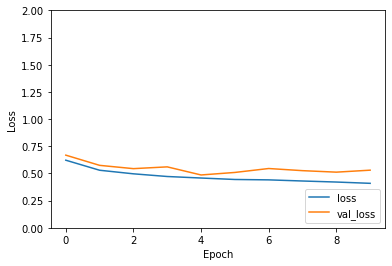

In [ ]:
plt.plot(rep.history['loss'], label='loss')
plt.plot(rep.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')